In [1]:
import numpy as np
# define loss function
def L2(theta):
    u1 = theta[0]
    u2 = theta[1]
    
    return 0.10*(1-u1)**2+0.90*(1-0.5*u1*u2-u2)**2+1

In [25]:
from scipy.optimize import minimize
mini = minimize(L2, np.array([1,1]))
print(mini.x)

[1.00000004 0.66666665]


In [2]:
# define minimum
minimum = np.array([1,2/3])

Simple 'taking average' algorithm

In [168]:
# define algorithm A with averaging
def algorithm_A_avg(n_iters, replications, avg_no):
    min_loss = 1.0
    # loss matrix
    loss_mat = np.zeros((replications, n_iters+1))  
    # initialize error matrix
    error_mat = np.zeros((replications, n_iters+1))
    
    for i in range(replications):
        # initialize theta and calculate loss
        theta = 2*np.ones(2)
        # include error with stable noise
        loss = np.mean([L2(theta) + np.random.normal(0,1) for k in range(avg_no)])
        # update loss matrix without noise
        loss_mat[i,0] = L2(theta) - min_loss
        # update error matrix
        error_mat[i,0] = np.linalg.norm(theta-minimum)
    
        # loop for n_iters (number of iterations)
        for j in range(n_iters):
            # using uniform distribution, randomly choose theta
            new_theta = np.random.uniform(-3,3,size=2)
            # calculate new loss
            new_loss = np.mean([L2(new_theta) + np.random.normal(0,1) for k in range(avg_no)])
            # update
            if new_loss < loss:
                theta = new_theta
                loss = new_loss

            # update loss matrix without noise
            loss_mat[i,j+1] = L2(theta) - min_loss

            # update error matrix
            error_mat[i,j+1] = np.linalg.norm(theta-minimum)
    
    # normalize
    return np.mean(loss_mat, axis=0)/(loss_mat[0,0]), np.mean(error_mat, axis=0)/error_mat[0,0]

In [169]:
loss_avg, error_avg = algorithm_A_avg(1000, 40, 1000)

Text(0.5, 1.0, 'Simple Averaging')

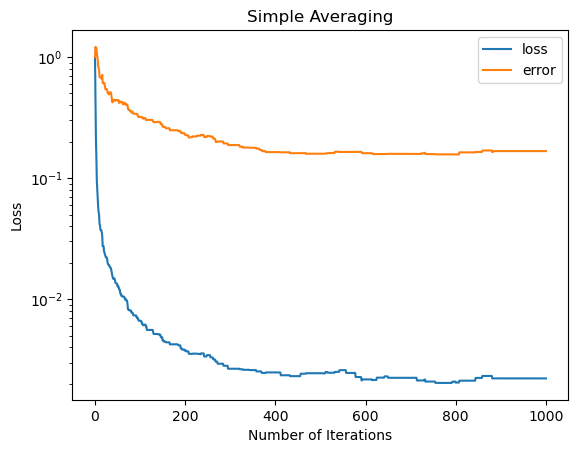

In [170]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1001), loss_avg, label='loss')
plt.plot(np.arange(1001), error_avg, label='error')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.title('Simple Averaging')

In [166]:
# define algorithm A with averaging
def algorithm_A_avg_WB(n_iters, replications, avg_no):
    min_loss = 1.0
    # loss matrix
    loss_mat = np.zeros((replications, n_iters+1))  
    # initialize error matrix
    error_mat = np.zeros((replications, n_iters+1))
    
    for i in range(replications):
        # initialize theta and calculate loss
        theta = 2*np.ones(2)
        # include error with stable noise
        loss = np.mean([L2(theta) + np.random.weibull(5) for k in range(avg_no)])
        # update loss matrix without noise
        loss_mat[i,0] = L2(theta) - min_loss
        # update error matrix
        error_mat[i,0] = np.linalg.norm(theta-minimum)
    
        # loop for n_iters (number of iterations)
        for j in range(n_iters):
            # using uniform distribution, randomly choose theta
            new_theta = np.random.uniform(-3,3,size=2)
            # calculate new loss
            new_loss = np.mean([L2(new_theta) + np.random.weibull(5) for k in range(avg_no)])
            # update
            if new_loss < loss:
                theta = new_theta
                loss = new_loss

            # update loss matrix without noise
            loss_mat[i,j+1] = L2(theta) - min_loss

            # update error matrix
            error_mat[i,j+1] = np.linalg.norm(theta-minimum)
    
    # normalize
    return np.mean(loss_mat, axis=0)/(loss_mat[0,0]), np.mean(error_mat, axis=0)/error_mat[0,0]

Text(0.5, 1.0, 'Simple Averaging with Weibull Noise')

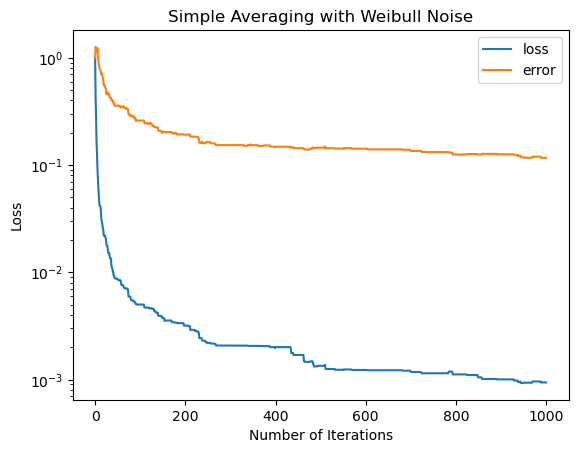

In [167]:
loss_avg_WB, error_avg_WB = algorithm_A_avg_WB(1000, 40, 1000)

plt.plot(np.arange(1001), loss_avg_WB, label='loss')
plt.plot(np.arange(1001), error_avg_WB, label='error')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.title('Simple Averaging with Weibull Noise')

In [164]:
# define algorithm A with averaging
def algorithm_A_avg_Cauchy(n_iters, replications, avg_no):
    min_loss = 1.0
    # loss matrix
    loss_mat = np.zeros((replications, n_iters+1))  
    # initialize error matrix
    error_mat = np.zeros((replications, n_iters+1))
    
    for i in range(replications):
        # initialize theta and calculate loss
        theta = 2*np.ones(2)
        # include error with stable noise
        loss = np.mean([L2(theta) + np.random.laplace(0,1) for k in range(avg_no)])
        # update loss matrix without noise
        loss_mat[i,0] = L2(theta) - min_loss
        # update error matrix
        error_mat[i,0] = np.linalg.norm(theta-minimum)
    
        # loop for n_iters (number of iterations)
        for j in range(n_iters):
            # using uniform distribution, randomly choose theta
            new_theta = np.random.uniform(-3,3,size=2)
            # calculate new loss
            new_loss = np.mean([L2(new_theta) + np.random.laplace(0,1) for k in range(avg_no)])
            # update
            if new_loss < loss:
                theta = new_theta
                loss = new_loss

            # update loss matrix without noise
            loss_mat[i,j+1] = L2(theta) - min_loss

            # update error matrix
            error_mat[i,j+1] = np.linalg.norm(theta-minimum)
    
    # normalize
    return np.mean(loss_mat, axis=0)/(loss_mat[0,0]), np.mean(error_mat, axis=0)/error_mat[0,0]

Text(0.5, 1.0, 'Simple Averaging with Laplace Noise')

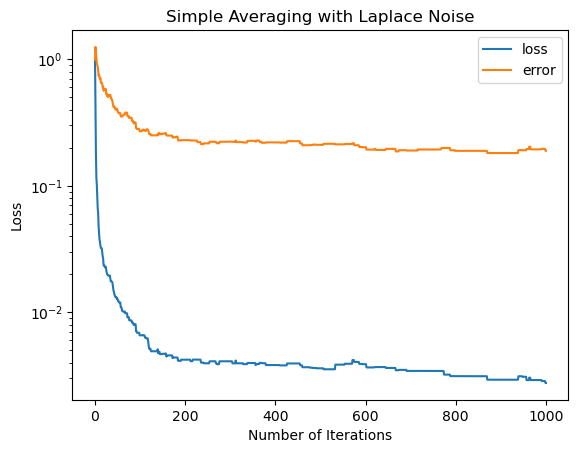

In [165]:
loss_avg_C, error_avg_C = algorithm_A_avg_Cauchy(1000, 40, 1000)

plt.plot(np.arange(1001), loss_avg_C, label='loss')
plt.plot(np.arange(1001), error_avg_C, label='error')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.title('Simple Averaging with Laplace Noise')

Alexander et al: ISSARS algorithm

In [161]:
# define algorithm A with averaging
def algorithm_A_ISSARS(n_iters, replications):
    min_loss = 1.0
    # loss matrix
    loss_mat = np.zeros((replications, n_iters+1))  
    # initialize error matrix
    error_mat = np.zeros((replications, n_iters+1))
    
    for i in range(replications):
        # initialize n
        n = 1
        # initialize theta and calculate loss
        theta = 2*np.ones(2)
        # include error with stable noise
        loss = np.mean([L2(theta) + np.random.normal(0,1) for k in range(n)])
        # update loss matrix without noise
        loss_mat[i,0] = L2(theta) - min_loss
        # update error matrix
        error_mat[i,0] = np.linalg.norm(theta-minimum)
    
        # loop for n_iters (number of iterations)
        for j in range(n_iters):
            # using uniform distribution, randomly choose theta
            new_theta = np.random.uniform(-3,3,size=2)
            # increase n
            n += 1
            # calculate new loss
            new_loss = np.mean([L2(new_theta) + np.random.normal(0,1) for k in range(n)])
            # update
            if new_loss < loss:
                theta = new_theta
                loss = new_loss

            # update loss matrix without noise
            loss_mat[i,j+1] = L2(theta) - min_loss

            # update error matrix
            error_mat[i,j+1] = np.linalg.norm(theta-minimum)
    
    # normalize
    return np.mean(loss_mat, axis=0)/(loss_mat[0,0]), np.mean(error_mat, axis=0)/error_mat[0,0]

In [162]:
loss_ISSARS, error_ISSARS = algorithm_A_ISSARS(1000, 40)

Text(0.5, 1.0, 'ISSARS')

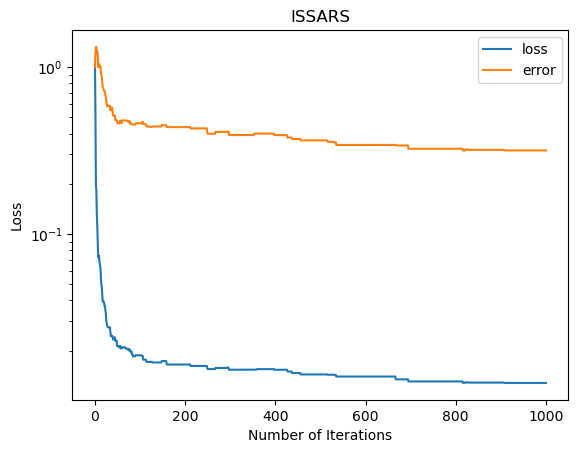

In [163]:
plt.plot(np.arange(1001), loss_ISSARS, label='loss')
plt.plot(np.arange(1001), error_ISSARS, label='error')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.title('ISSARS')

Devroye stable errors:
1. normal
2. exponential
3. Laplace (unstable)

In [158]:
# define algorithm A
def algorithm_A(n_iters, replications):
    min_loss = 1.0
    # loss matrix
    loss_mat = np.zeros((replications, n_iters+1))  
    # initialize error matrix
    error_mat = np.zeros((replications, n_iters+1))
    
    for i in range(replications):
        # initialize theta and calculate loss
        theta = 2*np.ones(2)
        # include error with stable noise
        loss = L2(theta) + np.random.normal(0,1)
        # update loss matrix without noise
        loss_mat[i,0] = L2(theta) - min_loss
        # update error matrix
        error_mat[i,0] = np.linalg.norm(theta-minimum)
    
        # loop for n_iters (number of iterations)
        for j in range(n_iters):
            # using uniform distribution, randomly choose theta
            new_theta = np.random.uniform(-3,3,size=2)
            # calculate new loss
            new_loss = L2(new_theta) + np.random.normal(0,1)
            # update
            if new_loss < loss:
                theta = new_theta
                loss = new_loss

            # update loss matrix without noise
            loss_mat[i,j+1] = L2(theta) - min_loss

            # update error matrix
            error_mat[i,j+1] = np.linalg.norm(theta-minimum)
    
    # normalize
    return np.mean(loss_mat, axis=0)/(loss_mat[0,0]), np.mean(error_mat, axis=0)/error_mat[0,0]

In [159]:
loss, error = algorithm_A(1000, 40)

Text(0.5, 1.0, 'Normal Error')

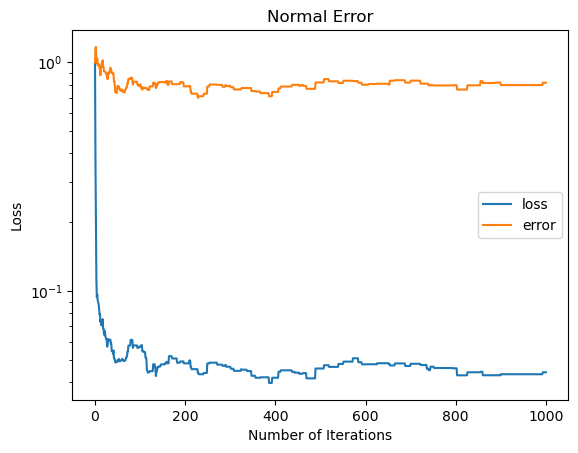

In [160]:
plt.plot(np.arange(1001), loss, label='loss')
plt.plot(np.arange(1001), error, label='error')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.yscale('log')
plt.title('Normal Error')

Text(0.5, 1.0, 'Normal Error')

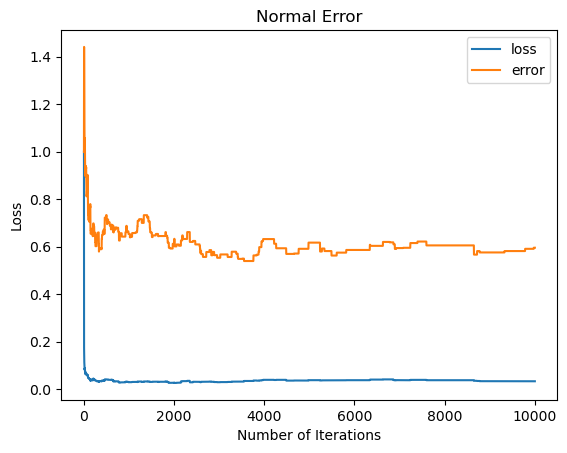

In [33]:
loss, error = algorithm_A(10000, 40)

plt.plot(np.arange(10001), loss, label='loss')
plt.plot(np.arange(10001), error, label='error')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Normal Error')

Normal error: Not enough evidence to show it converges??? SEE ALGORITHM B BELOW: converges but very slowly

In [155]:
# define algorithm A2
def algorithm_A2(n_iters, replications):
    min_loss = 1.0
    # loss matrix
    loss_mat = np.zeros((replications, n_iters+1))  
    # initialize error matrix
    error_mat = np.zeros((replications, n_iters+1))
    
    for i in range(replications):
        # initialize theta and calculate loss
        theta = 2*np.ones(2)
        # include error with stable noise
        loss = L2(theta) + np.random.exponential(1)
        # update loss matrix without noise
        loss_mat[i,0] = L2(theta) - min_loss
        # update error matrix
        error_mat[i,0] = np.linalg.norm(theta-minimum)
    
        # loop for n_iters (number of iterations)
        for j in range(n_iters):
            # using uniform distribution, randomly choose theta
            new_theta = np.random.uniform(-3,3,size=2)
            # calculate new loss
            new_loss = L2(new_theta) + np.random.exponential(1)
            # update
            if new_loss < loss:
                theta = new_theta
                loss = new_loss

            # update loss matrix without noise
            loss_mat[i,j+1] = L2(theta) - min_loss

            # update error matrix
            error_mat[i,j+1] = np.linalg.norm(theta-minimum)
    
    # normalize
    return np.mean(loss_mat, axis=0)/(loss_mat[0,0]), np.mean(error_mat, axis=0)/error_mat[0,0]

In [156]:
loss2, error2 = algorithm_A2(1000, 40)

Text(0.5, 1.0, 'Exponential Error')

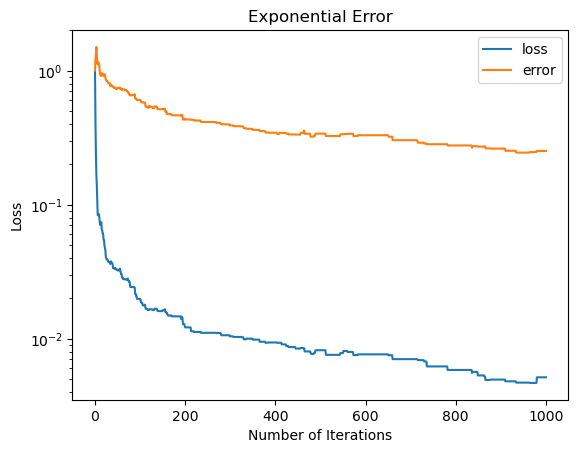

In [157]:
plt.plot(np.arange(1001), loss2, label='loss')
plt.plot(np.arange(1001), error2, label='error')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.yscale('log')
plt.title('Exponential Error')

In [154]:
loss2, error2 = algorithm_A2(10000, 40)

plt.plot(np.arange(10001), loss2, label='loss')
plt.plot(np.arange(10001), error2, label='error')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.yscale('log')
plt.title('Exponential Error')

NameError: name 'algorithm_A2' is not defined

Exponential loss: ???

In [149]:
# define algorithm A3
def algorithm_A3(n_iters, replications):
    min_loss = 1.0
    # loss matrix
    loss_mat = np.zeros((replications, n_iters+1))  
    # initialize error matrix
    error_mat = np.zeros((replications, n_iters+1))
    
    for i in range(replications):
        # initialize theta and calculate loss
        theta = 2*np.ones(2)
        # include error with stable noise
        loss = L2(theta) + np.random.laplace(0,1)
        # update loss matrix without noise
        loss_mat[i,0] = L2(theta) - min_loss
        # update error matrix
        error_mat[i,0] = np.linalg.norm(theta-minimum)
    
        # loop for n_iters (number of iterations)
        for j in range(n_iters):
            # using uniform distribution, randomly choose theta
            new_theta = np.random.uniform(-3,3,size=2)
            # calculate new loss
            new_loss = L2(new_theta) + np.random.laplace(0,1)
            # update
            if new_loss < loss:
                theta = new_theta
                loss = new_loss

            # update loss matrix without noise
            loss_mat[i,j+1] = L2(theta) - min_loss

            # update error matrix
            error_mat[i,j+1] = np.linalg.norm(theta-minimum)
    
    # normalize
    return np.mean(loss_mat, axis=0)/(loss_mat[0,0]), np.mean(error_mat, axis=0)/error_mat[0,0]

In [150]:
loss3, error3 = algorithm_A3(1000, 40)

Text(0.5, 1.0, 'Laplace Error')

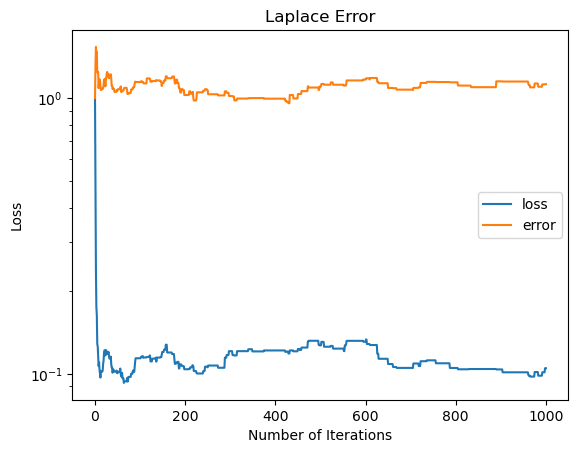

In [151]:
plt.plot(np.arange(1001), loss3, label='loss')
plt.plot(np.arange(1001), error3, label='error')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.title('Laplace Error')

Text(0.5, 1.0, 'Laplace Error')

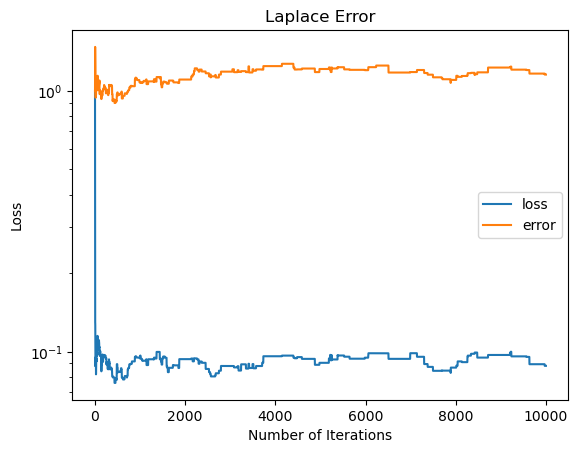

In [153]:
loss3, error3 = algorithm_A3(10000, 40)

plt.plot(np.arange(10001), loss3, label='loss')
plt.plot(np.arange(10001), error3, label='error')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.title('Laplace Error')

Laplace/Double Exponential error: Likely does not converge?

With positive threshold according to Spall

In [146]:
# define algorithm A with T
def algorithm_AT(n_iters, replications):
    min_loss = 1.0
    # loss matrix
    loss_mat = np.zeros((replications, n_iters+1))  
    # initialize error matrix
    error_mat = np.zeros((replications, n_iters+1))
    # define threshold
    T = 1
    
    for i in range(replications):
        # initialize theta and calculate loss
        theta = 2*np.ones(2)
        # include error with stable noise
        loss = L2(theta) + np.random.normal(0,1)
        # update loss matrix without noise
        loss_mat[i,0] = L2(theta) - min_loss
        # update error matrix
        error_mat[i,0] = np.linalg.norm(theta-minimum)
    
        # loop for n_iters (number of iterations)
        for j in range(n_iters):
            # using uniform distribution, randomly choose theta
            new_theta = np.random.uniform(-3,3,size=2)
            # calculate new loss
            new_loss = L2(new_theta) + np.random.normal(0,1)
            # update
            if new_loss < loss - T:
                theta = new_theta
                loss = new_loss

            # update loss matrix without noise
            loss_mat[i,j+1] = L2(theta) - min_loss

            # update error matrix
            error_mat[i,j+1] = np.linalg.norm(theta-minimum)
    
    # normalize
    return np.mean(loss_mat, axis=0)/(loss_mat[0,0]), np.mean(error_mat, axis=0)/error_mat[0,0]

In [147]:
lossT, errorT = algorithm_AT(1000, 40)

Text(0.5, 1.0, 'With Constant Threshold')

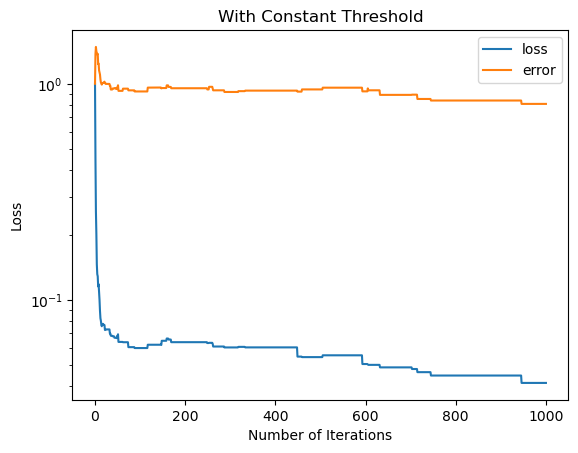

In [148]:
plt.plot(np.arange(1001), lossT, label='loss')
plt.plot(np.arange(1001), errorT, label='error')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.yscale('log')
plt.title('With Constant Threshold')

Gelfand and Mitter

In [54]:
# define algorithm A with W
def algorithm_AW(n_iters, replications):
    min_loss = 1.0
    # loss matrix
    loss_mat = np.zeros((replications, n_iters+1))  
    # initialize error matrix
    error_mat = np.zeros((replications, n_iters+1))
    
    for i in range(replications):
        # initialize theta and calculate loss
        theta = 2*np.ones(2)
        # include error with stable noise
        loss = L2(theta) + np.random.normal(0,1)
        # update loss matrix without noise
        loss_mat[i,0] = L2(theta) - min_loss
        # update error matrix
        error_mat[i,0] = np.linalg.norm(theta-minimum)
    
        # loop for n_iters (number of iterations)
        for j in range(n_iters):
            # using uniform distribution, randomly choose theta
            new_theta = np.random.uniform(-3,3,size=2)
            # calculate new loss
            new_loss = L2(new_theta) + np.random.normal(0,1)
            # decreasing variance of W
            var = 0.3*1.002**j
            # random variable W
            W = np.abs(np.random.normal(0,var))
            # update
            if new_loss - loss + W < 0:
                theta = new_theta
                loss = new_loss

            # update loss matrix without noise
            loss_mat[i,j+1] = L2(theta) - min_loss

            # update error matrix
            error_mat[i,j+1] = np.linalg.norm(theta-minimum)
    
    # normalize
    return np.mean(loss_mat, axis=0)/(loss_mat[0,0]), np.mean(error_mat, axis=0)/error_mat[0,0]

In [59]:
lossW, errorW = algorithm_AW(1000, 40)

Text(0.5, 1.0, 'With Random Threshold')

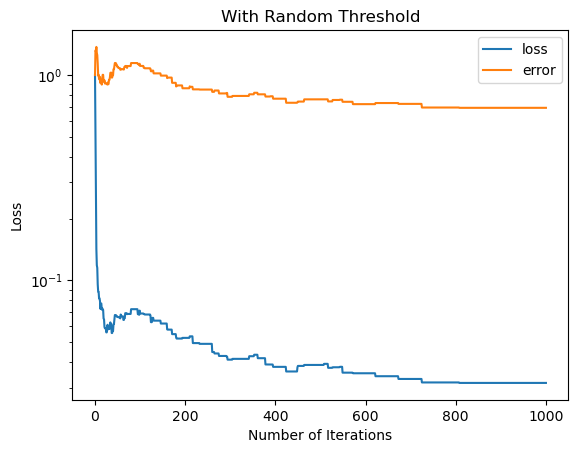

In [143]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1001), lossW, label='loss')
plt.plot(np.arange(1001), errorW, label='error')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.title('With Random Threshold')

possible?

In [83]:
# define algorithm B
def algorithm_B(n_iters, replications):
    min_loss = 1.0
    # loss matrix
    loss_mat = np.zeros((replications, n_iters+1))  
    # initialize error matrix
    error_mat = np.zeros((replications, n_iters+1))
    
    for i in range(replications):
        # initialize theta and calculate loss
        theta = 3*np.ones(2)
        # include error with stable noise
        loss = L2(theta) + np.random.normal(0,1)
        # update loss matrix without noise
        loss_mat[i,0] = L2(theta) - min_loss
        # update error matrix
        error_mat[i,0] = np.linalg.norm(theta-minimum)
    
        # loop for n_iters (number of iterations)
        for j in range(n_iters):
            # using uniform distribution, generate random vector d
            d = np.random.uniform(-0.5,0.5,size=2)
            new_theta = theta + d
            # calculate new loss
            new_loss = L2(new_theta) + np.random.normal(0,1)
            # update
            if new_loss < loss:
                theta = new_theta
                loss = new_loss

            # update loss matrix without noise
            loss_mat[i,j+1] = L2(theta) - min_loss

            # update error matrix
            error_mat[i,j+1] = np.linalg.norm(theta-minimum)
    
    # normalize
    return np.mean(loss_mat, axis=0)/(loss_mat[0,0]), np.mean(error_mat, axis=0)/error_mat[0,0]

In [134]:
lossB, errorB = algorithm_B(1000, 40)

Text(0.5, 1.0, 'Algorithm B')

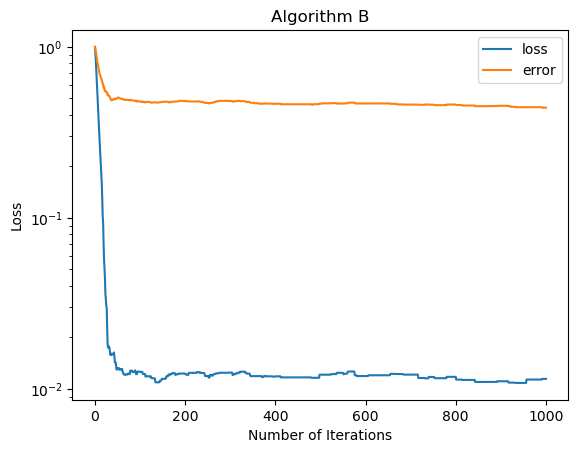

In [142]:
plt.plot(np.arange(1001), lossB, label='loss')
plt.plot(np.arange(1001), errorB, label='error')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.yscale('log')
plt.title('Algorithm B')

Text(0.5, 1.0, 'Algorithm B')

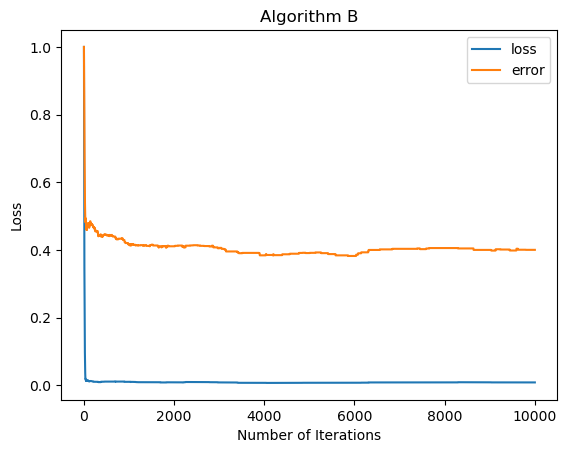

In [88]:
lossB, errorB = algorithm_B(10000, 40)

plt.plot(np.arange(10001), lossB, label='loss')
plt.plot(np.arange(10001), errorB, label='error')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Algorithm B')

In [136]:
# define algorithm B
def algorithm_B_backtracking(n_iters, replications):
    min_loss = 1.0
    # loss matrix
    loss_mat = np.zeros((replications, n_iters+1))  
    # initialize error matrix
    error_mat = np.zeros((replications, n_iters+1))
    
    for i in range(replications):
        # initialize theta and calculate loss
        theta = 3*np.ones(2)
        # include error with stable noise
        loss = L2(theta) + np.random.normal(0,1)
        # update loss matrix without noise
        loss_mat[i,0] = L2(theta) - min_loss
        # update error matrix
        error_mat[i,0] = np.linalg.norm(theta-minimum)
    
        # loop for n_iters (number of iterations)
        for j in range(n_iters):
            # using uniform distribution, generate random vector d
            d = np.random.uniform(-0.5,0.5,size=2)
            new_theta = theta + d
            # at a small probability, take the minimum of 50 measurements
            z = np.random.uniform(0,1)
            if z < 0.1:
                new_loss = np.min([L2(new_theta) + np.random.normal(0,1) for k in range(50)])
            # calculate new loss
            else: 
                new_loss = L2(new_theta) + np.random.normal(0,1)
            
            if new_loss < loss:
                # update
                theta = new_theta
                loss = new_loss

            # update loss matrix without noise
            loss_mat[i,j+1] = L2(theta) - min_loss

            # update error matrix
            error_mat[i,j+1] = np.linalg.norm(theta-minimum)
    
    # normalize
    return np.mean(loss_mat, axis=0)/(loss_mat[0,0]), np.mean(error_mat, axis=0)/error_mat[0,0]

In [137]:
lossB_b, errorB_b = algorithm_B_backtracking(1000, 40)

Text(0.5, 1.0, 'Algorithm B With Minimum')

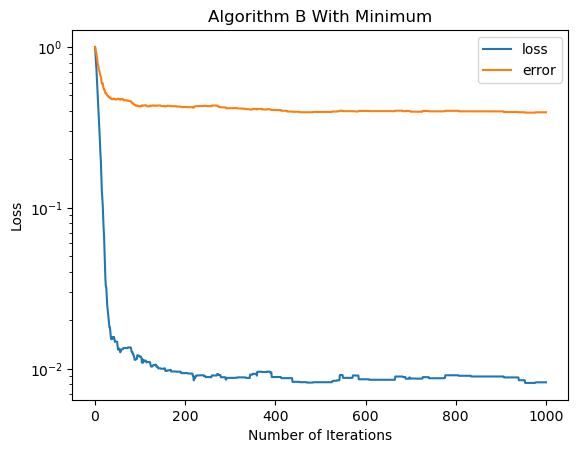

In [141]:
plt.plot(np.arange(1001), lossB_b, label='loss')
plt.plot(np.arange(1001), errorB_b, label='error')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.title('Algorithm B With Minimum')

Text(0.5, 1.0, 'Algorithm B With Minimum')

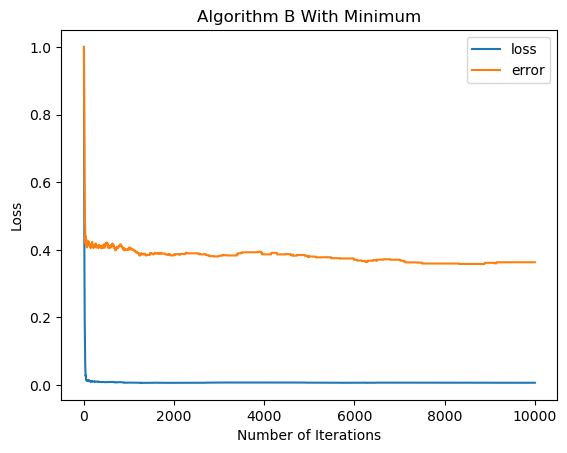

In [97]:
lossB_b, errorB_b = algorithm_B_backtracking(10000, 40)

plt.plot(np.arange(10001), lossB_b, label='loss')
plt.plot(np.arange(10001), errorB_b, label='error')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Algorithm B With Minimum')

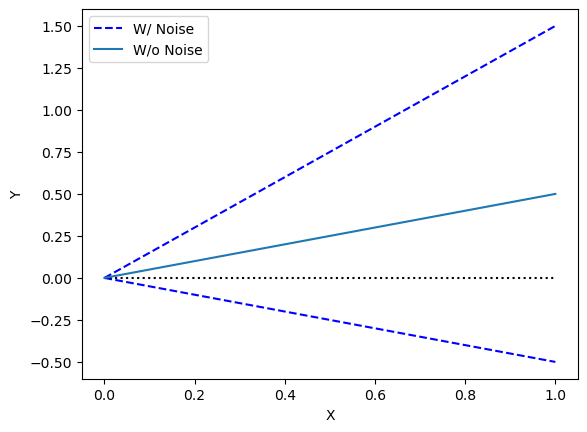

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def y_upper(theta):
    return theta/2 + theta

def y_lower(theta):
    return theta/2 - theta


x = np.linspace(0,1,100)
plt.plot(x, y_upper(x), color='blue', linestyle='dashed', label='W/ Noise')
plt.plot(x, y_lower(x), color='blue', linestyle='dashed')
plt.plot(x, np.zeros(100), color='black', linestyle='dotted')
plt.plot(x, x/2, label='W/o Noise')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()

Text(0.5, 1.0, 'Range of Y with errors')

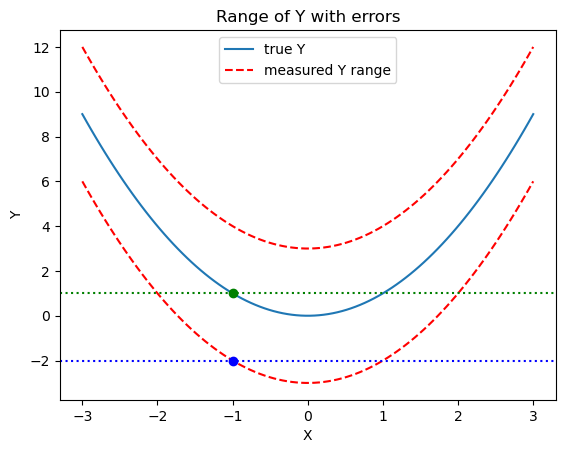

In [122]:
x = np.linspace(-3,3,100)
plt.plot(x, x**2, label='true Y')
plt.plot(x, x**2+3, color = 'red', linestyle = 'dashed', label='measured Y range')
plt.plot(x, x**2-3, color = 'red', linestyle = 'dashed')
plt.plot(-1, 1**2,'go')
plt.axhline(y = 1, color = 'g', linestyle = 'dotted') 
plt.plot(-1, 1-3, 'bo')
plt.axhline(y = -2, color = 'b', linestyle = 'dotted') 
plt.legend()
plt.ylabel('Y')
plt.xlabel('X')
plt.title('Range of Y with errors')